In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [3]:
import tensorflow_datasets as tfds

In [4]:
import pathlib
train_data_dir = '/Users/eunhyang/dev/fluent_python/datasets/cat_vs_dog/training_set'
train_data_dir =  pathlib.Path(train_data_dir)

In [5]:
train_data_dir

PosixPath('/Users/eunhyang/dev/fluent_python/datasets/cat_vs_dog/training_set')

In [6]:
image_count = len(list(train_data_dir.glob('*/*.jpg')))
print(image_count)

8000


In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8000 files belonging to 2 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)


['cats', 'dogs']


In [10]:
val_data_dir = '/Users/eunhyang/dev/fluent_python/datasets/cat_vs_dog/test_set'
val_data_dir =  pathlib.Path(val_data_dir)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 2 classes.


Exception ignored in: <function tqdm.__del__ at 0x143ed38c8>
Traceback (most recent call last):
  File "/Users/eunhyang/.local/share/virtualenvs/fluent_python--xzt8hVp/lib/python3.7/site-packages/tqdm/std.py", line 1087, in __del__
    self.close()
  File "/Users/eunhyang/.local/share/virtualenvs/fluent_python--xzt8hVp/lib/python3.7/site-packages/tqdm/notebook.py", line 258, in close
    self.sp(bar_style='success')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'
Exception ignored in: <function tqdm.__del__ at 0x143ed38c8>
Traceback (most recent call last):
  File "/Users/eunhyang/.local/share/virtualenvs/fluent_python--xzt8hVp/lib/python3.7/site-packages/tqdm/std.py", line 1087, in __del__
    self.close()
  File "/Users/eunhyang/.local/share/virtualenvs/fluent_python--xzt8hVp/lib/python3.7/site-packages/tqdm/notebook.py", line 258, in close
    self.sp(bar_style='success')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'
Exception ignored in: <function tqdm._

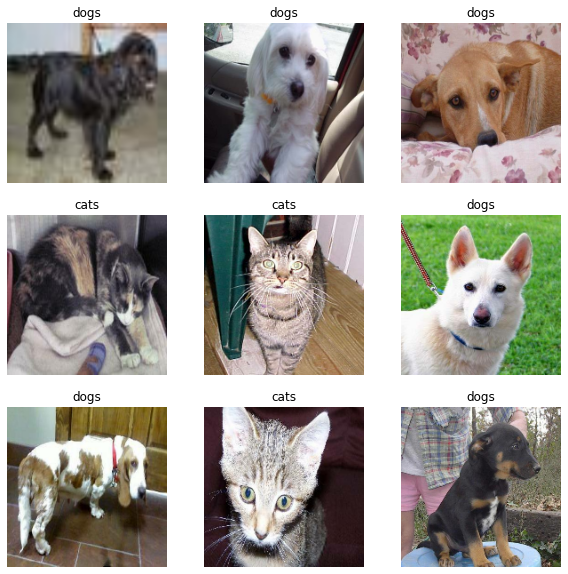

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [43]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [44]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [48]:
num_classes = 2
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [49]:
model.compile(
  optimizer='adam',
  loss=tf.losses.(from_logits=True),
  metrics=['accuracy'])

In [51]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
250/250 [==============================] - 161s 641ms/step - loss: 0.7348 - accuracy: 0.5196 - val_loss: 0.6757 - val_accuracy: 0.5855
Epoch 2/10
250/250 [==============================] - 143s 568ms/step - loss: 0.6627 - accuracy: 0.6012 - val_loss: 0.6170 - val_accuracy: 0.6560
Epoch 3/10
250/250 [==============================] - 138s 552ms/step - loss: 0.5784 - accuracy: 0.6951 - val_loss: 0.5385 - val_accuracy: 0.7315
Epoch 4/10
250/250 [==============================] - 152s 606ms/step - loss: 0.4939 - accuracy: 0.7573 - val_loss: 0.5913 - val_accuracy: 0.7185
Epoch 5/10
250/250 [==============================] - 157s 628ms/step - loss: 0.4238 - accuracy: 0.8047 - val_loss: 0.5534 - val_accuracy: 0.7570
Epoch 6/10
250/250 [==============================] - 144s 574ms/step - loss: 0.3466 - accuracy: 0.8440 - val_loss: 0.6251 - val_accuracy: 0.7285
Epoch 7/10
250/250 [==============================] - 135s 539ms/step - loss: 0.2730 - accuracy: 0.8854 - val_loss: 0.7153 -

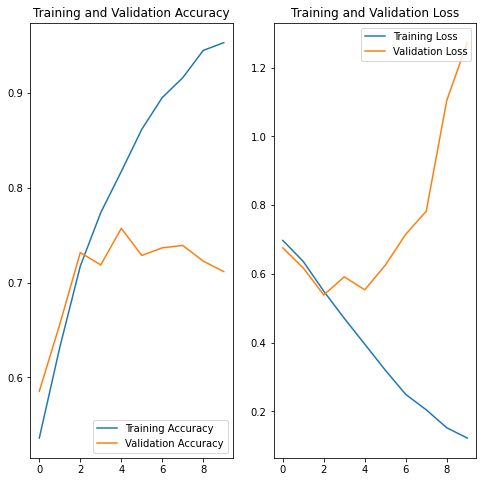

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

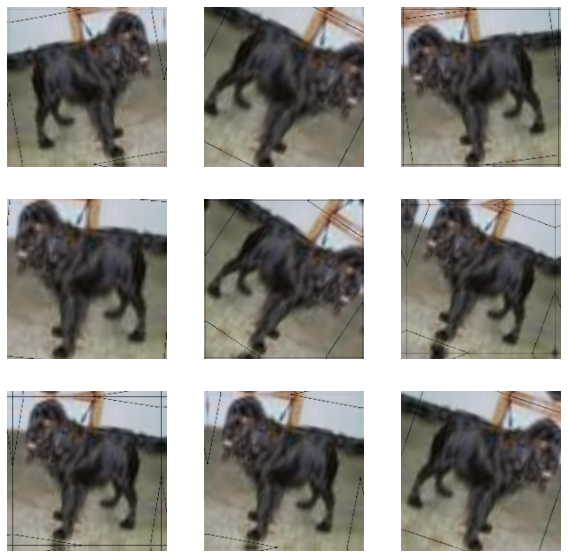

In [12]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [14]:
num_classes = 2
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [16]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
250/250 [==============================] - 162s 643ms/step - loss: 0.8614 - accuracy: 0.5001 - val_loss: 0.6905 - val_accuracy: 0.5875
Epoch 2/15
250/250 [==============================] - 155s 617ms/step - loss: 0.6788 - accuracy: 0.5830 - val_loss: 0.6448 - val_accuracy: 0.6510
Epoch 3/15
250/250 [==============================] - 160s 638ms/step - loss: 0.6306 - accuracy: 0.6475 - val_loss: 0.6128 - val_accuracy: 0.6725
Epoch 4/15
250/250 [==============================] - 153s 610ms/step - loss: 0.6002 - accuracy: 0.6775 - val_loss: 0.5944 - val_accuracy: 0.6865
Epoch 5/15
250/250 [==============================] - 154s 615ms/step - loss: 0.5756 - accuracy: 0.7050 - val_loss: 0.6013 - val_accuracy: 0.6740
Epoch 6/15
250/250 [==============================] - 139s 555ms/step - loss: 0.5613 - accuracy: 0.7122 - val_loss: 0.5429 - val_accuracy: 0.7225
Epoch 7/15
250/250 [==============================] - 157s 626ms/step - loss: 0.5278 - accuracy: 0.7332 - val_loss: 0.5330 -

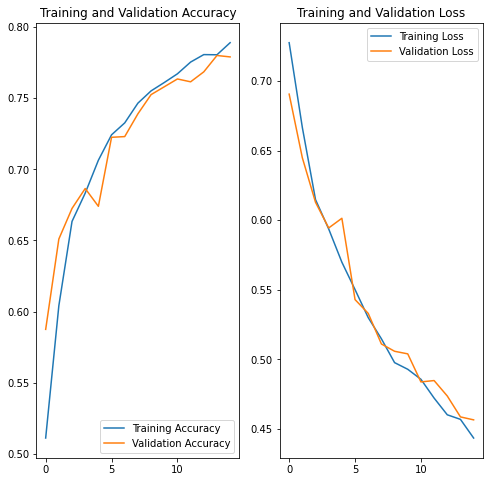

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# cat_path = '/Users/eunhyang/dev/fluent_python/datasets/cat_vs_dog/cat2.jpeg'
cat_path_url = 'https://images.mypetlife.co.kr/content/uploads/2019/09/06150205/cat-baby-4208578_1920.jpg'
cat_path = tf.keras.utils.get_file('Cat', origin=cat_path_url)
img = keras.preprocessing.image.load_img(
    cat_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

532480/525468 [==============================] - 0s 0us/step
This image most likely belongs to cats with a 79.03 percent confidence.
